**Problem statement**

Create a regression model that predicts the price of a house for sale. 

In [1]:
# Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score


**EDA--version 1**

In [2]:
# read in train dataset as housing

housing = pd.read_csv('./datasets/train.csv')

In [3]:
# set up display

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_info_rows', 500)
pd.set_option('display.max_rows', 500)
# idea taken from Jeff Hale

In [4]:
# inspect data

housing.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [5]:
# datatypes

housing.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [6]:
# descriptives

housing.drop(['Id', 'PID'], axis=1).describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Number of rows: 2051
Number of columns with missing data: 26


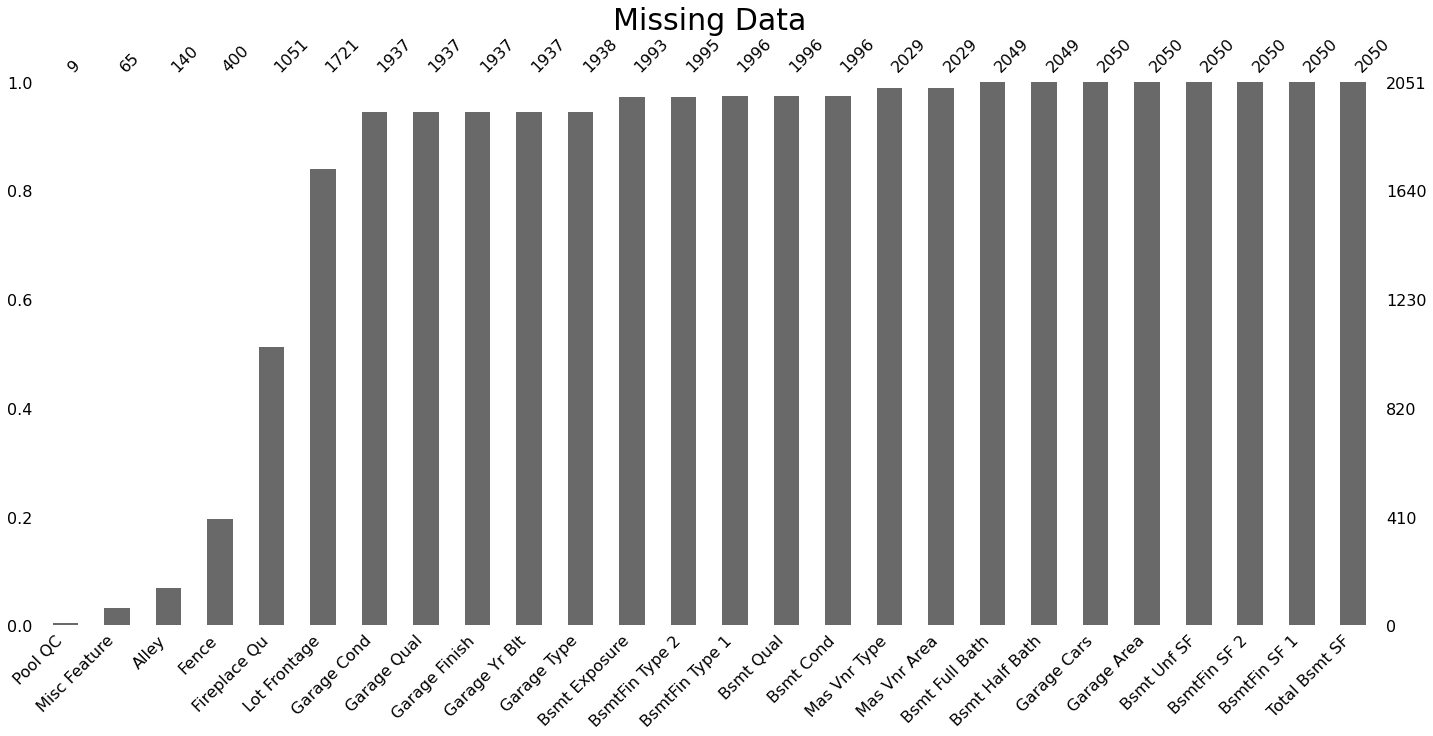

In [7]:
# display columns with missing values

print(f'Number of rows: {housing.shape[0]}')

missings = housing.columns[housing.isna().sum() > 0]
print(f'Number of columns with missing data: {missings.shape[0]}')
plt.title('Missing Data', fontsize=30)
msno.bar(housing[missings], sort='ascending');

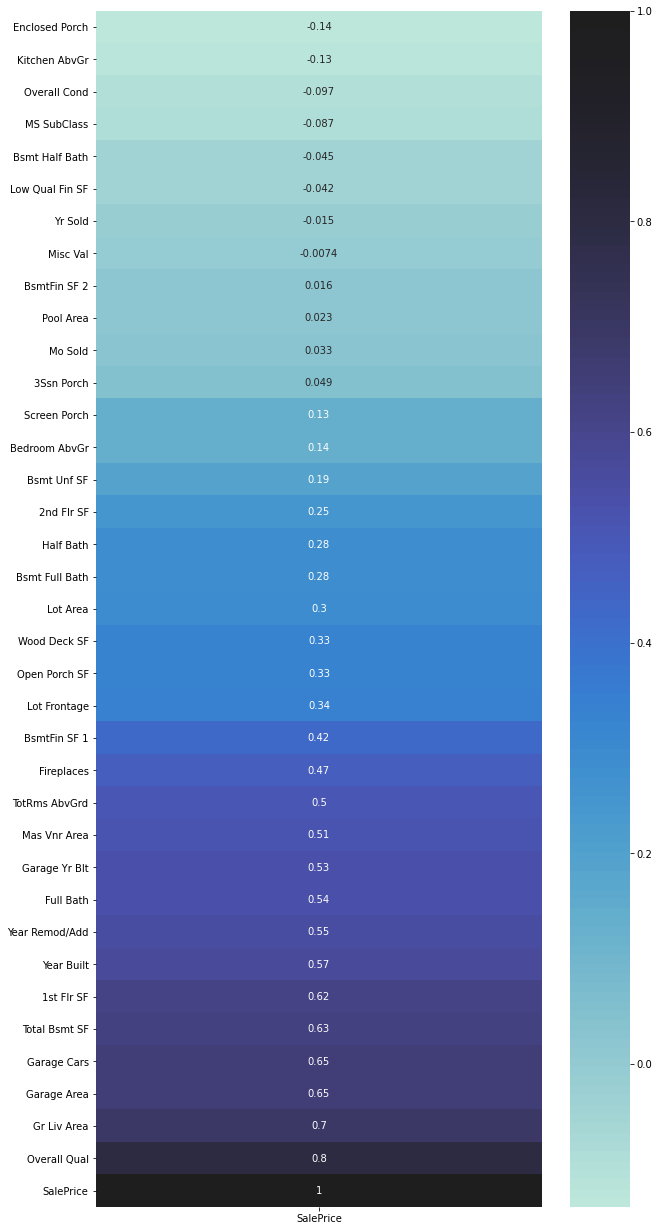

In [8]:
# heatmap of correlation matrix of numeric variables

plt.figure(figsize=(10, 22))
sns.heatmap(housing.drop(['Id', 'PID'], axis=1).corr()[['SalePrice']].sort_values(by='SalePrice'),
            annot=True,
            center=True,
            );

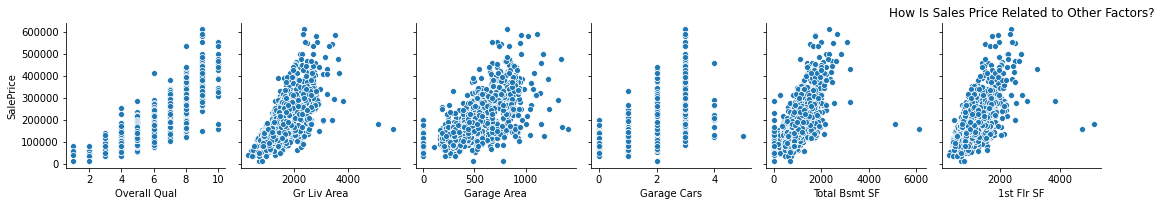

In [9]:
# pairplots for variables with at least 0.5 correlation with SalesPrice


sns.pairplot(housing, x_vars=['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF'], 
                      y_vars=['SalePrice']); 
plt.title('How Is Sales Price Related to Other Factors?');

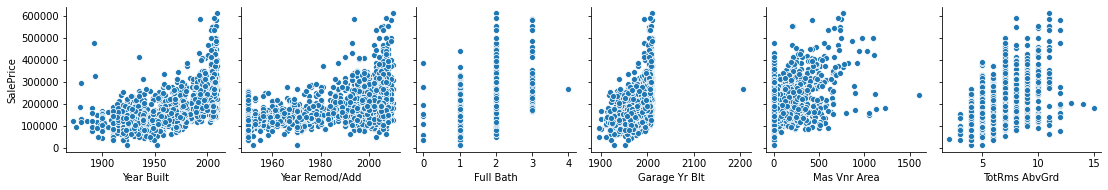

In [10]:
sns.pairplot(housing, x_vars=['Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd'],
                      y_vars=['SalePrice']);

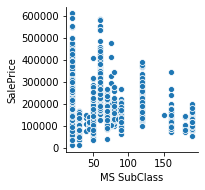

In [11]:
sns.pairplot(housing, x_vars=['MS SubClass'],
                      y_vars=['SalePrice']);

''

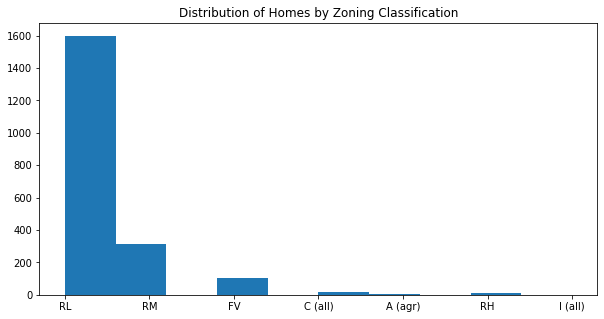

In [12]:
# histogram MS Zoning

plt.figure(figsize=(10, 5))
plt.hist(housing['MS Zoning'])
plt.title("Distribution of Homes by Zoning Classification")
;

In [13]:
# distribution of MS Zoning

housing['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

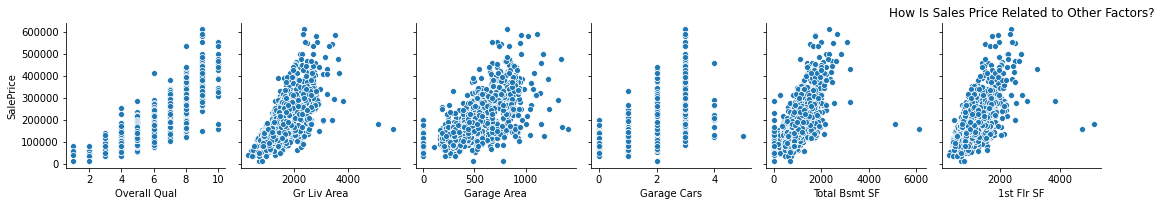

In [14]:
# pairplots for variables with at least 0.5 correlation with SalesPrice


sns.pairplot(housing, x_vars=['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF'], 
                      y_vars=['SalePrice']); 
plt.title('How Is Sales Price Related to Other Factors?');

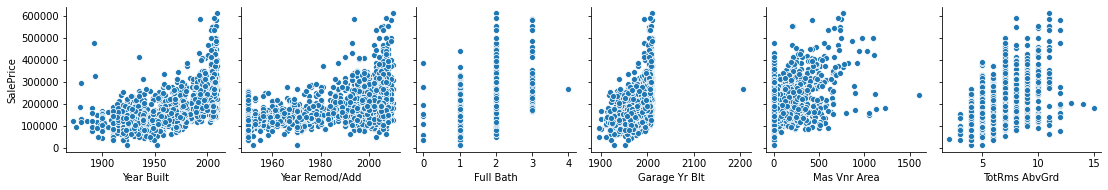

In [15]:
sns.pairplot(housing, x_vars=['Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd'],
                      y_vars=['SalePrice']);

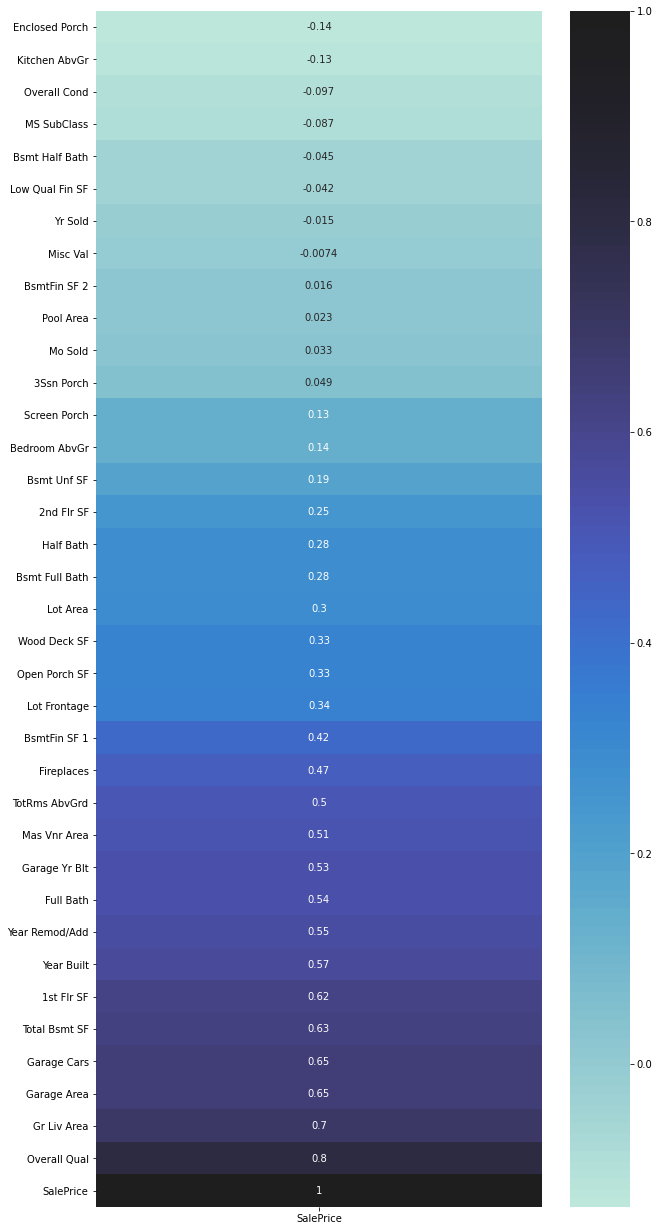

In [16]:
# heatmap of correlation matrix of numeric variables

plt.figure(figsize=(10, 22))
sns.heatmap(housing.drop(['Id', 'PID'], axis=1).corr()[['SalePrice']].sort_values(by='SalePrice'),
            annot=True,
            center=True,
            );

In [17]:
# max number of features in the model

np.sqrt(housing.shape[0])

45.28796749689701

In [18]:
housing[housing['Lot Frontage'].isna()]['MS Zoning'].value_counts()

RL    289
RM     25
FV     13
RH      3
Name: MS Zoning, dtype: int64

**EDA--version 2**

In [19]:
# read in modified dataset

housing2 = pd.read_csv('./datasets/modified_train.csv')

/Users/bibor/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
# remove Total Bsmt Sf, Gr Liv Area from features - because they were used in creating Total Area

housing2.drop(['Total Bsmt SF', 'Gr Liv Area'], axis=1, inplace=True)

In [21]:
# filter out variables where the absolute value of the correlation to Sale Price
# is smaller than .5

correlation = housing2.corr()[['SalePrice']]
top_features = correlation[np.abs(correlation['SalePrice']) >= .5]

print('Number of top features:', top_features.shape[0])

Number of top features: 13


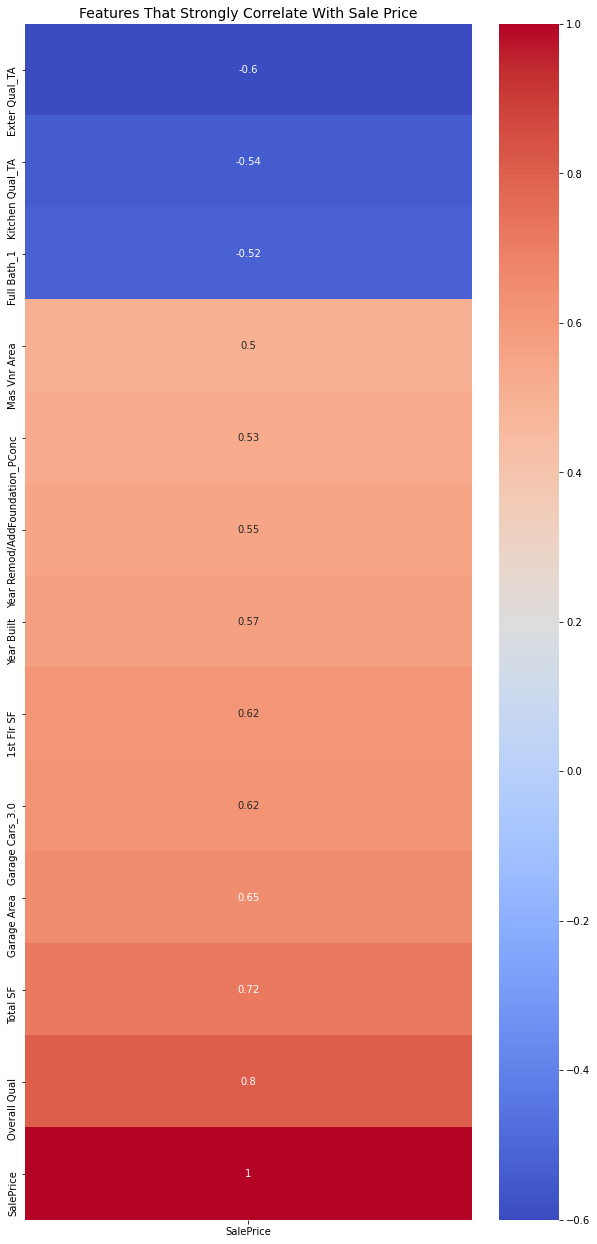

In [22]:
# heatmap of top 12 variables 

plt.figure(figsize=(10, 22))
plt.title("Features That Strongly Correlate With Sale Price", fontsize=(14))
sns.heatmap(top_features.sort_values(by='SalePrice'),
            annot=True,
            cmap='coolwarm',
            );

plt.savefig('./figures/correlation_heatmap.png')

In [23]:
# the 12 top variables 

top12 = ['Overall Qual', 'Total SF', 'Garage Area', 'Garage Cars_3.0', '1st Flr SF', 'Year Built', 
                 'Year Remod/Add', 'Foundation_PConc', 'Mas Vnr Area', 'Full Bath_1', 'Kitchen Qual_TA', 'Exter Qual_TA']

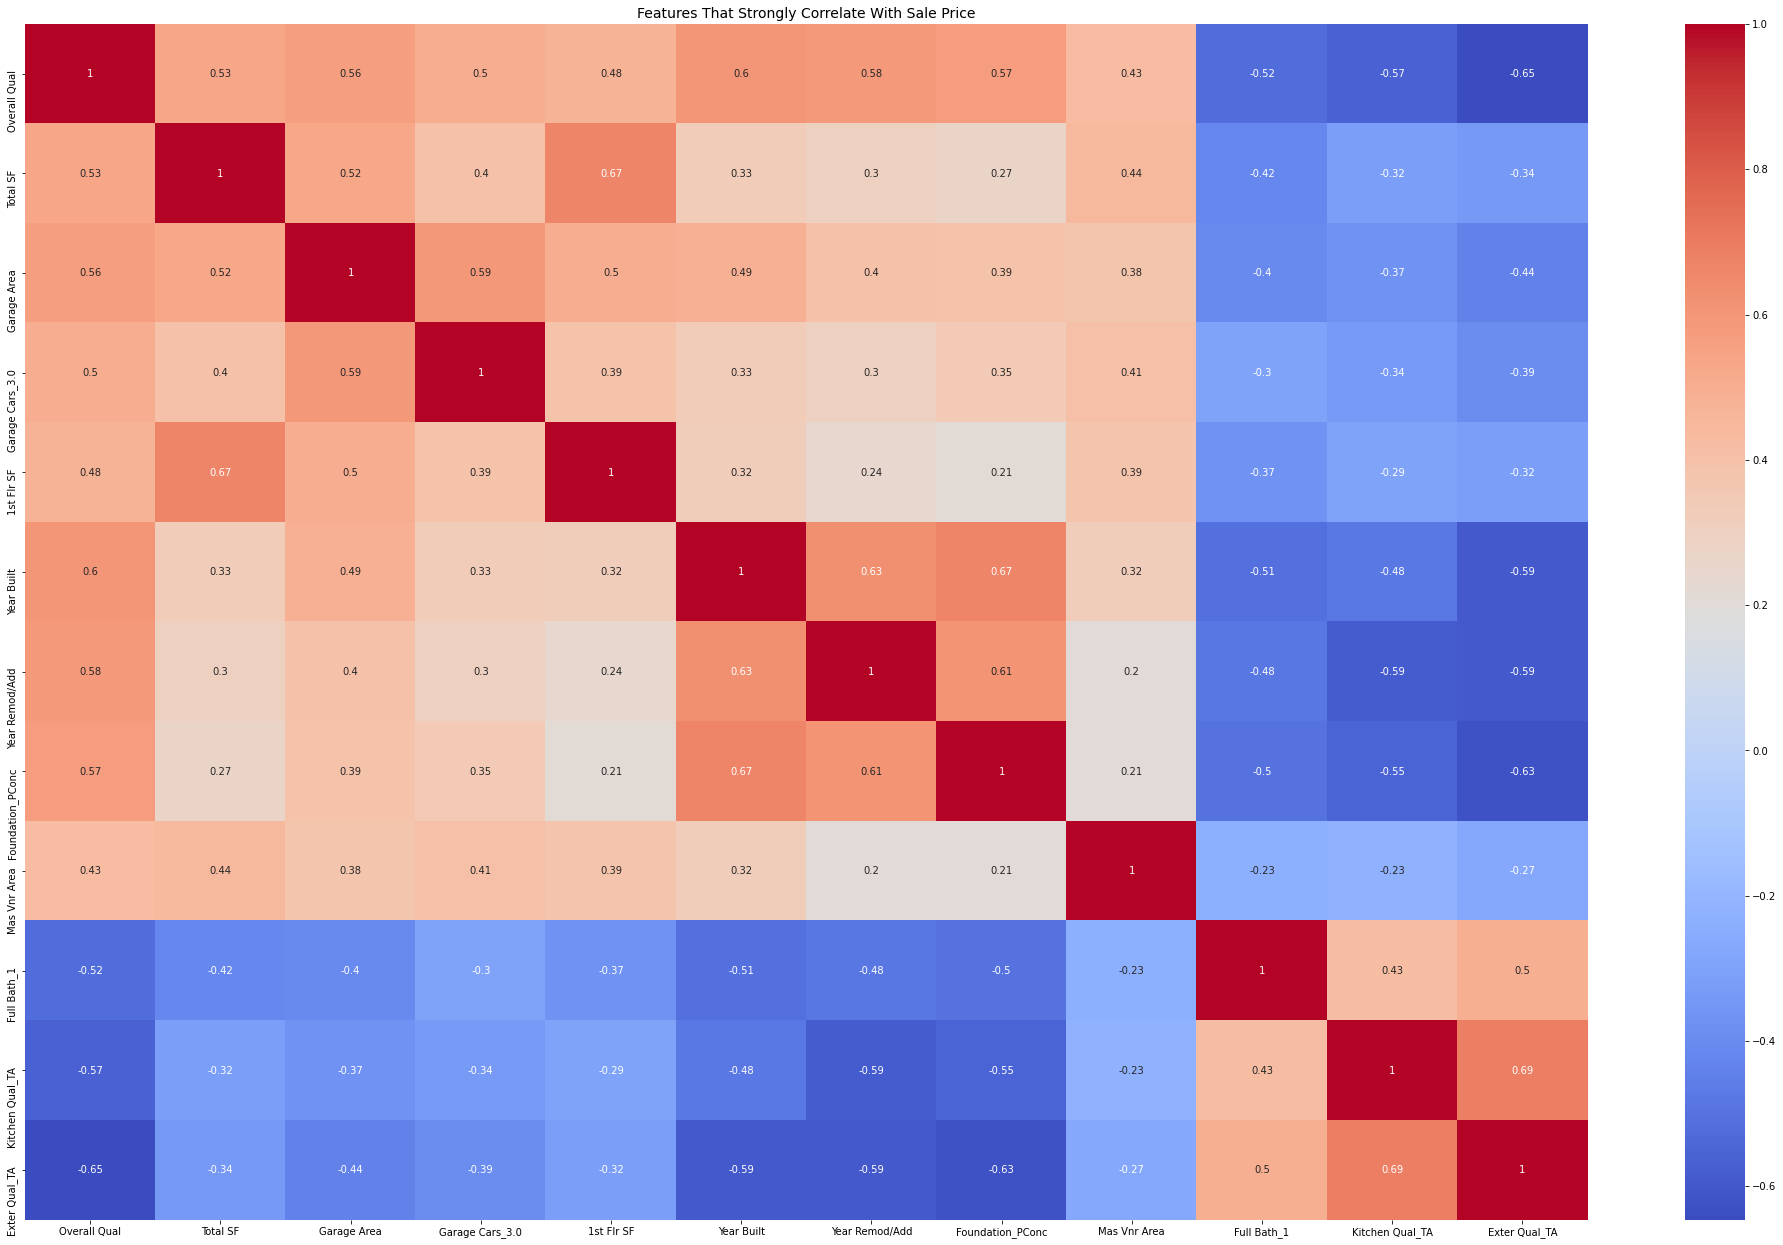

In [24]:
# exploring multicollinearity among the top 14 variables

plt.figure(figsize=(35, 22))
plt.title("Features That Strongly Correlate With Sale Price", fontsize=(14))
sns.heatmap(housing2[top12].corr(),
            annot=True,
            cmap='coolwarm',
            );


In [25]:
# features that had higher than .7 correlation with each other - were considered to have multicolliniarity issue
# check source
# non of the top 12 features had multicollinearity issues 

In [37]:
# logarithm of Sale Price

housing2['log_price'] = np.log(housing2['SalePrice'])

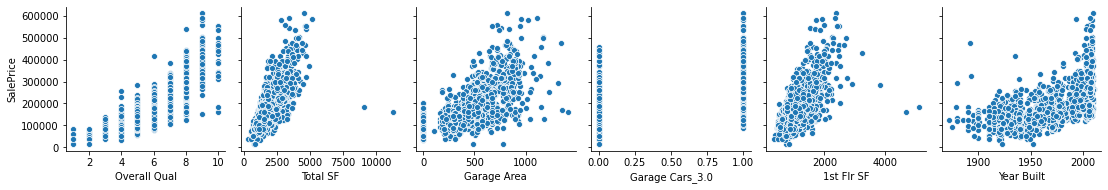

In [27]:
sns.pairplot(housing2, x_vars=top12[:6],
                      y_vars=['SalePrice']);

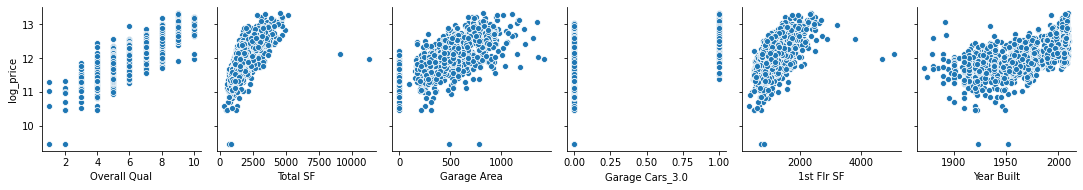

In [38]:
sns.pairplot(housing2, x_vars=top12[:6],
                      y_vars='log_price');

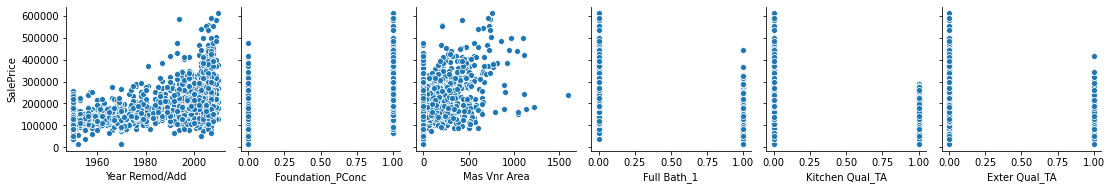

In [31]:
sns.pairplot(housing2, x_vars=top12[6:],
                      y_vars=['SalePrice']);

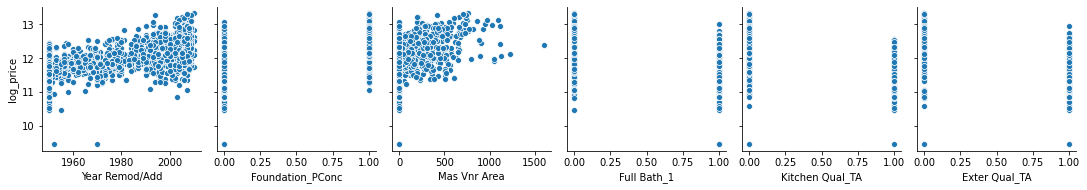

In [39]:
sns.pairplot(housing2, x_vars=top12[6:],
                      y_vars=['log_price']);

Using pair plots to examine how the relationship between the features and Sale Price compare to the realtionship between the features and log(Sale Price) - revealed that using a logaritmic scale on the y variable improved the linearity of these relationships for all continuous variables. ==> I will use log(Sale Price in the models)